<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Functions and Backpropagation



**Understanding Loss Functions**

• **What Are Loss Functions?**

 • Quantify the difference between the predicted output of a model and the actual target value

 • Guide the training process by providing a metric to minimize during optimization

• **Role in Neural Networks**

 • **Error Measurement**

  • Evaluate the accuracy of predictions

 • **Feedback for Optimization**

  • Provide gradients for weight updates via backpropagation



**Understanding Loss Functions**

• **Common Types of Loss Functions**

 • **Mean Squared Error (MSE)**

  • Commonly used for regression tasks

  • Penalizes larger errors more heavily than smaller ones

 • **Cross-Entropy Loss**

  • Used for classification tasks

  • Measures the difference     between true labels and predicted probabilities



**Introduction to Backpropagation**

• **What Is Backpropagation?**

 • Process of computing gradients for each weight and bias in a neural network, enabling optimization algorithms (like gradient descent) to minimize the loss function

• **Steps in Backpropagation**

 • **Forward Pass:** Compute the output and loss for the current weights

 • **Backward Pass:** Calculate the gradient of the loss with respect to each parameter

 • **Weight Update:** Use the gradients to update parameters

• **Key Concepts**

 • **Gradient:** The rate of change of the loss with respect to a parameter

 • **Gradient Descent:** An optimization algorithm that minimizes the loss by updating parameters in the direction of the negative gradient


**Objective**

- Implement basic loss functions, calculate gradients manually, and visualize the effects of different loss functions

MSE Loss: 0.0450
Binary Cross-Entropy LOSS: 0.2271
MSE Gradient: [-0.05  0.1  -0.1  -0.15]
BCE Gradient: [-1.11111111  1.25       -1.25       -1.42857143]


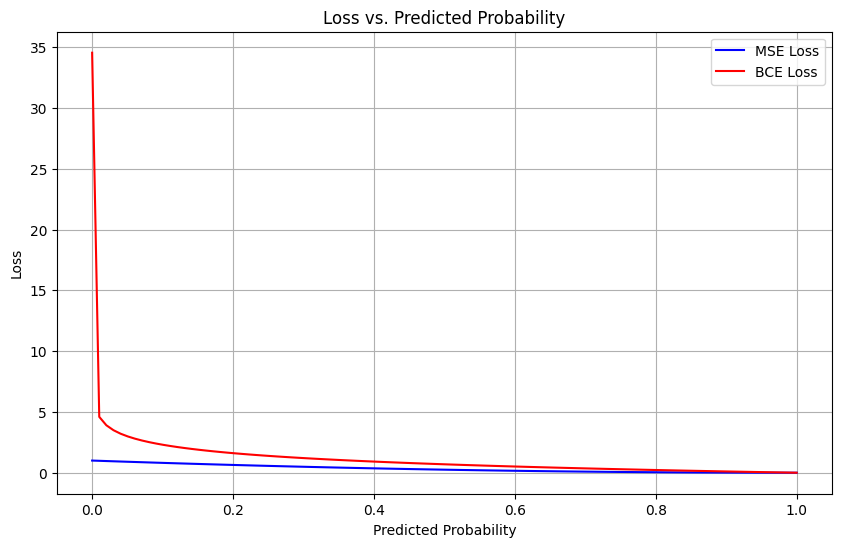

In [2]:
import numpy as np

# Mean Squared Error(MSE)loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Binary cross-Entropy(BCE)loss
def binary_cross_entropy_loss(y_true, y_pred):
  y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example Data
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.2, 0.8, 0.7])

# Calculate Loss
mse = mse_loss(y_true, y_pred)
bce = binary_cross_entropy_loss(y_true, y_pred)

print(f"MSE Loss: {mse:.4f}")
print(f"Binary Cross-Entropy LOSS: {bce:.4f}")

# Derivative of MSE loss
def mse_gradient(y_true, y_pred):
    return 2 * (y_pred - y_true) / len(y_true)

# Derivative of BCE loss
def bce_gradient(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return( y_pred - y_true) / ( y_pred * (1 - y_pred))

# Calculate gradients
grad_mse = mse_gradient(y_true, y_pred)
grad_bce = bce_gradient(y_true, y_pred)

print(f"MSE Gradient: {grad_mse}")
print(f"BCE Gradient: {grad_bce}")

import matplotlib.pyplot as plt

# Define Predictions and True labels
predictions = np.linspace(0, 1, 100)
true_label = 1

# Compute losses
mse_losses = [(true_label - p) ** 2 for p in predictions]
bce_losses = [-true_label * np.log(max(p, 1e-15)) - (1 - true_label) * np.log(max(1 - p, 1e-15)) for p in predictions]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(predictions, mse_losses, label="MSE Loss", color="blue")
plt.plot(predictions, bce_losses, label="BCE Loss", color="red")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Loss vs. Predicted Probability")
plt.legend()
plt.grid()
plt.show()